In [3]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno
import os

from datetime import datetime
import statistics

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns

# apply some cool styling
rcParams['figure.figsize'] = (12,  6)
sns.set(style='darkgrid', palette='pastel', font_scale=1)
mpl.rcParams['agg.path.chunksize'] = 10000

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_parquet('../../../../src/data/crime_data_2016_21.parquet')

In [5]:
df.head()

,station,province,district,crime_category,date,number_of_crimes,latitude,longitude
0,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Jan-16,470,27.90288,-33.02058
1,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Feb-16,411,27.90288,-33.02058
2,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Mar-16,477,27.90288,-33.02058
3,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Jan-17,476,27.90288,-33.02058
4,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Feb-17,427,27.90288,-33.02058


In [6]:
df.shape

(3665376, 8)

In [7]:
df.info()
df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3665376 entries, 0 to 3665375
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   station           object 
 1   province          object 
 2   district          object 
 3   crime_category    object 
 4   date              object 
 5   number_of_crimes  int32  
 6   latitude          float64
 7   longitude         float64
dtypes: float64(2), int32(1), object(5)
memory usage: 237.7+ MB


object     5
float64    2
int32      1
dtype: int64

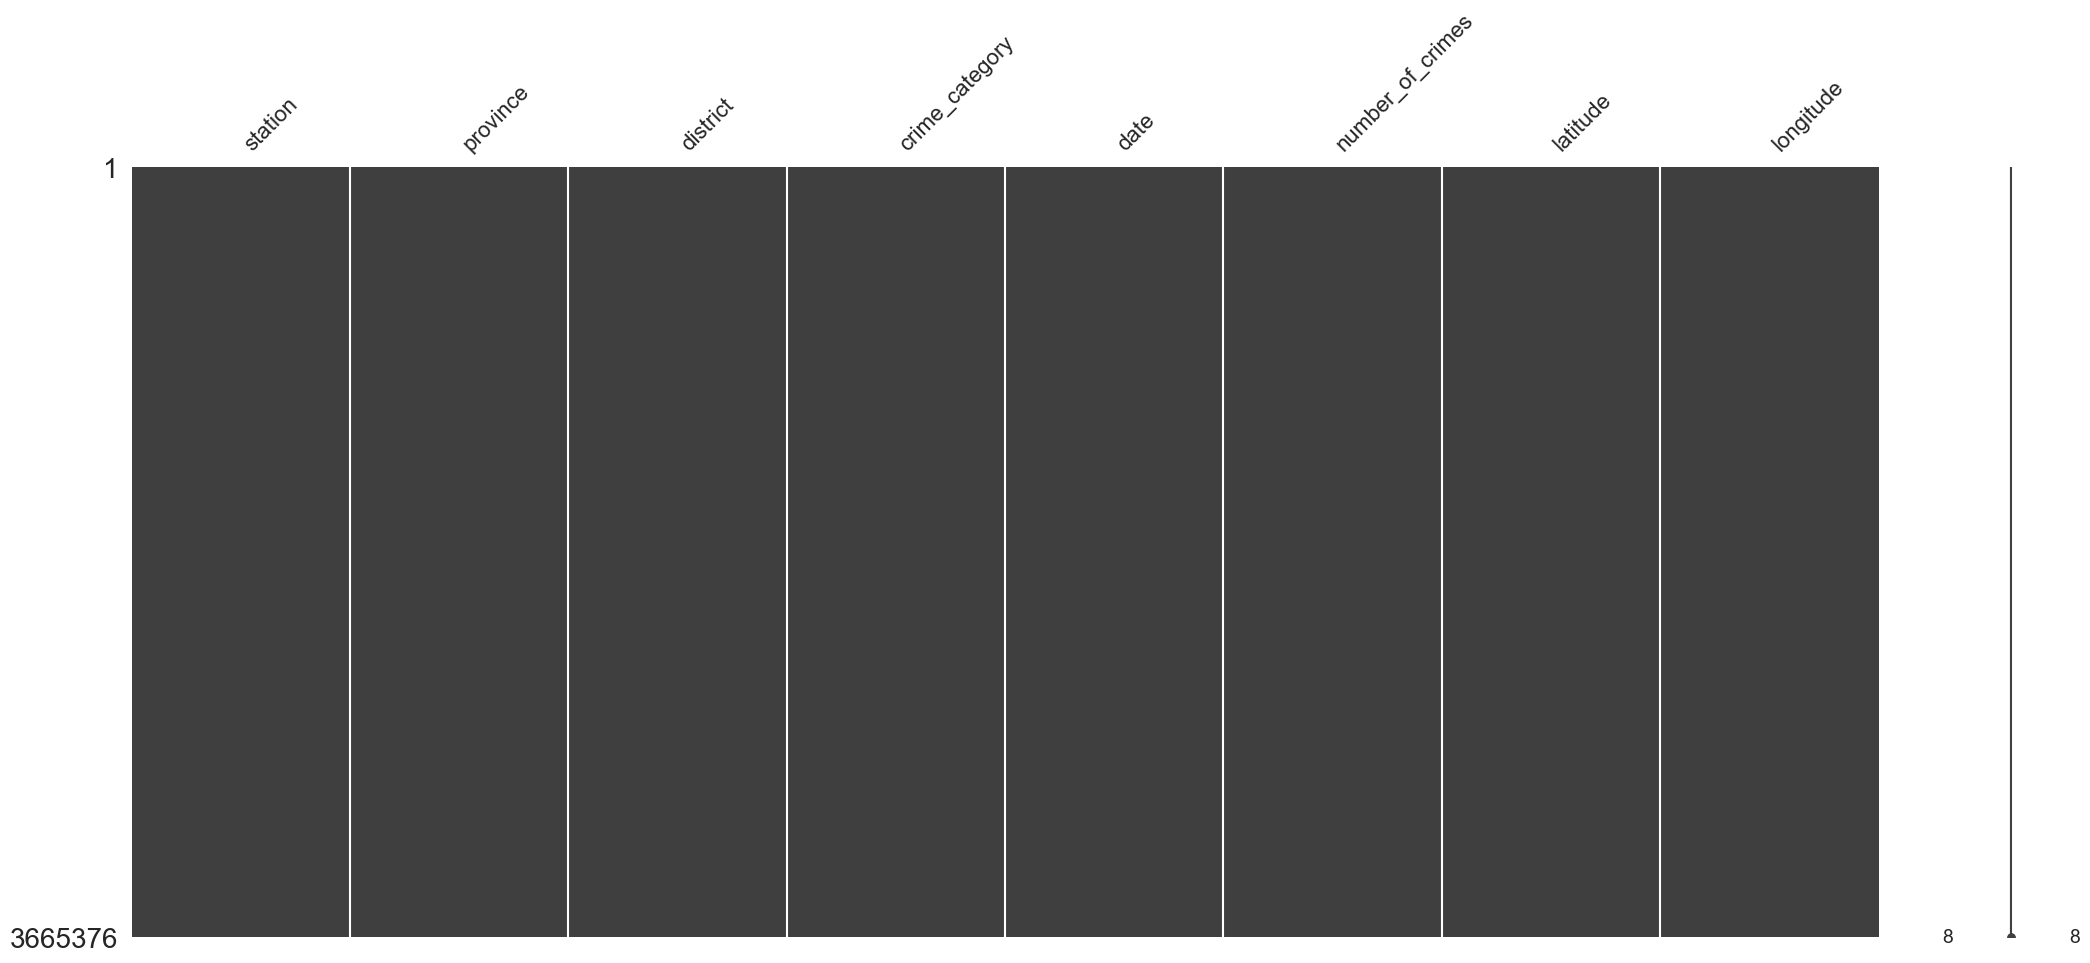

In [8]:
msno.matrix(df);

In [9]:
df.isnull().sum().sort_values(ascending=False)

station             0
province            0
district            0
crime_category      0
date                0
number_of_crimes    0
latitude            0
longitude           0
dtype: int64

In [10]:
print(
    'We have a total of:',
    sum(df.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We have a total of: 0 missing values.


In [11]:
# Number of duplicated rows
print(f'Number of duplicated rows:', df.duplicated().sum())
print(f'Rows and columns:', df.shape)

Number of duplicated rows: 0
Rows and columns: (3665376, 8)


In [12]:
df.columns= df.columns.str.strip().str.lower()
df.head()

,station,province,district,crime_category,date,number_of_crimes,latitude,longitude
0,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Jan-16,470,27.90288,-33.02058
1,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Feb-16,411,27.90288,-33.02058
2,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Mar-16,477,27.90288,-33.02058
3,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Jan-17,476,27.90288,-33.02058
4,east london,Eastern Cape,East London Cc,17 Community Reported Serious Crime,Feb-17,427,27.90288,-33.02058


In [14]:
for column in df.columns:
    print(column + ' : ' + str(len(df[column].unique())))
    if(len(df[column].unique()) < 150):
        print(column + ' : ' + str(df[column].unique()))
    print('\n')

station : 1157


province : 9
province : ['Eastern Cape' 'Free State' 'Gauteng' 'Kwazulu/Natal' 'Limpopo'
 'Mpumalanga' 'North West' 'Northern Cape' 'Western Cape']


district : 122
district : ['East London Cc' 'Mdantsane Cc' 'Mount Road Cc' 'Mthatha Cc'
 "King William'S T Cc" 'Motherwell Cc' 'Port St Johns Cc' 'Uitenhage Cc'
 'Graaff-Reinet Cc' 'Cradock Cc' 'Mount Ayliff Cc' 'Queenstown Cc'
 'Grahamstown Cc' 'Butterworth Cc' 'Aliwal North Cc' 'Humansdorp Cc'
 'Cofimvaba Cc' 'Alice Cc' 'Mount Fletcher Cc' 'Mqanduli Cc' 'Elliot Cc'
 'Port Alfred Cc' 'Port St John Cc' 'Park Road Cc' 'Welkom Cc'
 'Thabong Cc' 'Mangaung Cc' 'Selosesha Cc' 'Zamdela Cc'
 'Phuthaditjhaba Cc' 'Bethlehem Cc' 'Kroonstad Cc' 'Ficksburg Cc'
 'Smithfield Cc' 'Trompsburg Cc' 'Joburg West Cc' 'Joburg Central Cc'
 'Tshwane Central Cc' 'West Rand Cc' 'Tshwane North Cc' 'Tshwane East Cc'
 'Tshwane West Cc' 'Joburg North Cc' 'Ekurhuleni North Cc'
 'Joburg East Cc' 'Ekurhuleni Centr Cc' 'Ekurhuleni East Cc'
 'Soweto East 

In [17]:
len(df['district'].unique())

122

In [ ]:
df = pd.read_csv('/kaggle/input/crime-rate/crime_rate_2006-2016.csv')
df.head()

# We will correct the name of all provinces in order to make the merge smoothly
df["Province"].replace('Kwazulu/Natal','KwaZulu-Natal',inplace=True)

# we will calculate the total crimes from the year 2005 to 2016
m=list(df.columns)[8:19]
df['Total'] = df[m].sum(axis=1)
df['Total']

# We will calculate the Total crimes grouped by provinces
df_province=df.groupby("Province")["Total"].sum().sort_values(ascending=False).reset_index()
df_province

province_map = gpd.read_file("/kaggle/input/south-africa-government-boundaries/zaf_adm_sadb_ocha_20201109_SHP/zaf_admbnda_adm1_sadb_ocha_20201109.dbf")

province_map.rename(columns = {'ADM1_EN':'Province'}, inplace = True)

province_map1=province_map[["Province","geometry"]]

df_merged = pd.merge (province_map1, df_province, on= ['Province'], how='inner')

# We can visualize the total crimes per province along the map of South Africa
df_merged.explore(column='Total')
